# Challenge 1 - Tic Tac Toe

In this lab you will perform deep learning analysis on a dataset of playing [Tic Tac Toe](https://en.wikipedia.org/wiki/Tic-tac-toe).

There are 9 grids in Tic Tac Toe that are coded as the following picture shows:

![Tic Tac Toe Grids](https://github.com/TiagoBorges-lab/lab-neural-networks/blob/master/your-code/tttboard.jpg?raw=1)

In the first 9 columns of the dataset you can find which marks (`x` or `o`) exist in the grids. If there is no mark in a certain grid, it is labeled as `b`. The last column is `class` which tells you whether Player X (who always moves first in Tic Tac Toe) wins in this configuration. Note that when `class` has the value `False`, it means either Player O wins the game or it ends up as a draw.

Follow the steps suggested below to conduct a neural network analysis using Tensorflow and Keras. You will build a deep learning model to predict whether Player X wins the game or not.

## Step 1: Data Engineering

This dataset is almost in the ready-to-use state so you do not need to worry about missing values and so on. Still, some simple data engineering is needed.

1. Read `tic-tac-toe.csv` into a dataframe.
1. Inspect the dataset. Determine if the dataset is reliable by eyeballing the data.
1. Convert the categorical values to numeric in all columns.
1. Separate the inputs and output.
1. Normalize the input data.

In [20]:
# import libs
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler

#read file
tic = pd.read_csv('tic-tac-toe.csv')
#inspect dataset
tic.head()

,TL,TM,TR,ML,MM,MR,BL,BM,BR,class
0,x,x,x,x,o,o,x,o,o,True
1,x,x,x,x,o,o,o,x,o,True
2,x,x,x,x,o,o,o,o,x,True
3,x,x,x,x,o,o,o,b,b,True
4,x,x,x,x,o,o,b,o,b,True


In [21]:
#inspect dataset
tic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   TL      958 non-null    object
 1   TM      958 non-null    object
 2   TR      958 non-null    object
 3   ML      958 non-null    object
 4   MM      958 non-null    object
 5   MR      958 non-null    object
 6   BL      958 non-null    object
 7   BM      958 non-null    object
 8   BR      958 non-null    object
 9   class   958 non-null    bool  
dtypes: bool(1), object(9)
memory usage: 68.4+ KB


In [22]:
#view basic info and first rows.
print("\nUnique values per column:\n")
for col in tic.columns:
    print(col, tic[col].unique())


Unique values per column:

TL ['x' 'o' 'b']
TM ['x' 'o' 'b']
TR ['x' 'o' 'b']
ML ['x' 'o' 'b']
MM ['o' 'b' 'x']
MR ['o' 'b' 'x']
BL ['x' 'o' 'b']
BM ['o' 'x' 'b']
BR ['o' 'x' 'b']
class [ True False]


In [23]:
from collections.abc import Mapping
#Dataset is ok and clean
#Convert the categorical values to numeric in all columns

mapp = {'x' : 1, 'o' : -1, 'b' : 0}
tic_numeric = tic.copy()
for col in tic_numeric.columns[:-1]: #takes out the class column
    tic_numeric[col] = tic_numeric[col].map(mapp)

#convert 'class' to 1 (TRUE) and 0 (FALSE)
tic_numeric['class'] = tic_numeric['class'].astype(int)
tic_numeric.head()

,TL,TM,TR,ML,MM,MR,BL,BM,BR,class
0,1,1,1,1,-1,-1,1,-1,-1,1
1,1,1,1,1,-1,-1,-1,1,-1,1
2,1,1,1,1,-1,-1,-1,-1,1,1
3,1,1,1,1,-1,-1,-1,0,0,1
4,1,1,1,1,-1,-1,0,-1,0,1


In [34]:
#separate inputs and output

X = tic_numeric.drop('class', axis=1)
y = tic_numeric['class']

#Normalize the input data.
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

#convert back to dataframe
#X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
#X_scaled.head()

print("X_scaled shape:", X_scaled.shape)
print("y shape:", y.shape)

X_scaled shape: (958, 9)
y shape: (958,)


## Step 2: Build Neural Network

To build the neural network, you can refer to your own codes you wrote while following the [Deep Learning with Python, TensorFlow, and Keras tutorial](https://www.youtube.com/watch?v=wQ8BIBpya2k) in the lesson. It's pretty similar to what you will be doing in this lab.

1. Split the training and test data.
1. Create a `Sequential` model.
1. Add several layers to your model. Make sure you use ReLU as the activation function for the middle layers. Use Softmax for the output layer because each output has a single lable and all the label probabilities add up to 1.
1. Compile the model using `adam` as the optimizer and `sparse_categorical_crossentropy` as the loss function. For metrics, use `accuracy` for now.
1. Fit the training data.
1. Evaluate your neural network model with the test data.
1. Save your model as `tic-tac-toe.model`.

In [35]:
# Split the training and test data.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [36]:
#create a sequential model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [38]:
#add layers
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)), #input layer: same as number of features
    layers.Dense(32, activation= 'relu'),#hidden l1
    layers.Dense(16, activation= 'relu'),#hidden l2
    layers.Dense(2, activation= 'softmax')#output layer: 2 classes true/false
])

In [39]:
#compile model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy', #y are integer labls (0,1)
    metrics=['accuracy']
)

In [40]:
#training data
history = model.fit(
    X_train, y_train,
    epochs = 50,
    batch_size = 16,
    validation_split = 0.2,
    verbose = 1
)


Epoch 1/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.6713 - loss: 0.6267 - val_accuracy: 0.6623 - val_loss: 0.6117
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6970 - loss: 0.5682 - val_accuracy: 0.6688 - val_loss: 0.5923
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7163 - loss: 0.5509 - val_accuracy: 0.6818 - val_loss: 0.5755
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7358 - loss: 0.5263 - val_accuracy: 0.7078 - val_loss: 0.5525
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7754 - loss: 0.4839 - val_accuracy: 0.7338 - val_loss: 0.5308
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7962 - loss: 0.4624 - val_accuracy: 0.7532 - val_loss: 0.5100
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7741 - loss: 0.4727 - val_accuracy: 0.7532 - val_loss: 0.4968
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8189 - loss: 0.4195 - val_accuracy: 0.7727 - val_loss

In [46]:
#evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose = 0)
print(f"\nthe value of test accuracy is: {test_acc:4f} %")


the value of test accuracy is: 0.968750 %


In [48]:
#save the model
model.save('tic-tac-toe.keras')
print("model saved as tic-tac-toe.keras, the extension '.model' is not permitted on google colab")

model saved as tic-tac-toe.keras, the extension '.model' is not permitted on google colab


## Step 3: Make Predictions

Now load your saved model and use it to make predictions on a few random rows in the test dataset. Check if the predictions are correct.

In [49]:
model = keras.models.load_model('tic-tac-toe.keras')

In [50]:
idx = np.random.choice(len(X_test), 5, replace = False)
X_sample = X_test.iloc[idx]
y_true = y_test.iloc[idx]

print("Samples ind:", idx)
print("True Labels:", y_true.values)

Samples ind: [  1 161   4 133 154]
True Labels: [1 1 1 0 0]


In [51]:
pred_probs = model.predict(X_sample)

y_pred = np.argmax(pred_probs, axis = 1)
print("Predicted labels:", y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step
Predicted labels: [1 1 1 0 0]


In [52]:
#compare predictions vs true labels
for i in range(len(y_true)):
  print(f"Sample {i}: True = {y_true.iloc[i]}, Predicted = {y_pred[i]}")

Sample 0: True = 1, Predicted = 1
Sample 1: True = 1, Predicted = 1
Sample 2: True = 1, Predicted = 1
Sample 3: True = 0, Predicted = 0
Sample 4: True = 0, Predicted = 0


In [53]:
#Evaluate accuracy on the whole test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\nOverall test accuracy: {test_acc:.4f}")


Overall test accuracy: 0.9688


## Step 4: Improve Your Model

Did your model achieve low loss (<0.1) and high accuracy (>0.95)? If not, try to improve your model.

But how? There are so many things you can play with in Tensorflow and in the next challenge you'll learn about these things. But in this challenge, let's just do a few things to see if they will help.

* Add more layers to your model. If the data are complex you need more layers. But don't use more layers than you need. If adding more layers does not improve the model performance you don't need additional layers.
* Adjust the learning rate when you compile the model. This means you will create a custom `tf.keras.optimizers.Adam` instance where you specify the learning rate you want. Then pass the instance to `model.compile` as the optimizer.
    * `tf.keras.optimizers.Adam` [reference](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam).
    * Don't worry if you don't understand what the learning rate does. You'll learn about it in the next challenge.
* Adjust the number of epochs when you fit the training data to the model. Your model performance continues to improve as you train more epochs. But eventually it will reach the ceiling and the performance will stay the same.

In [57]:
# your code here
from tensorflow.keras.optimizers import Adam
"""model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(2, activation='softmax')
])
"""
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(2, activation='softmax')
])

optimizer = Adam(learning_rate=0.0005)

model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train, y_train,
    epochs=100,           # try 100, 200, etc.
    batch_size=16,
    validation_split=0.2,
    verbose=1
)

Epoch 1/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - accuracy: 0.6624 - loss: 0.6543 - val_accuracy: 0.6364 - val_loss: 0.6432
Epoch 2/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6358 - loss: 0.6290 - val_accuracy: 0.6364 - val_loss: 0.6189
Epoch 3/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6407 - loss: 0.6015 - val_accuracy: 0.6364 - val_loss: 0.5982
Epoch 4/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6686 - loss: 0.5569 - val_accuracy: 0.6429 - val_loss: 0.5684
Epoch 5/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6730 - loss: 0.5303 - val_accuracy: 0.6494 - val_loss: 0.5436
Epoch 6/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6983 - loss: 0.5135 - val_accuracy: 0.7208 - val_loss: 0.5167
Epoch 7/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7474 - loss: 0.4901 - val_accuracy: 0.7143 - val_loss: 0.4926
Epoch 8/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7715 - loss: 0.4434 - val_accuracy: 0.8312 - 

In [58]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}")



Test Accuracy: 0.9896


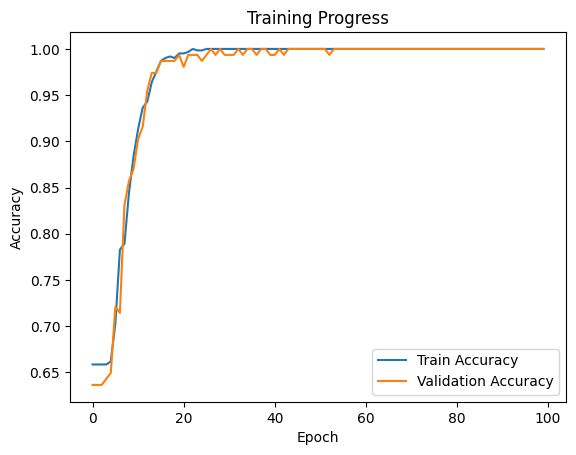

In [59]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training Progress')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Which approach(es) did you find helpful to improve your model performance?**

In [60]:
print("Adding more layers. Adjusting Learning Rate. Increase nº of epochs. ")

Adding more layers. Adjusting Learning Rate. Increase nº of epochs. 
